## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [105]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [106]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [107]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [108]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEDV    506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [109]:
#split the data in test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [110]:
#train the decision tree
regr = DecisionTreeRegressor(max_depth=3)

regr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [111]:
# MSE training
mse = regr.score(X_train, y_train)

sentence = 'The R-squared of the tree with depth = {0} é: {1:.2f}'

print(sentence.format(regr.get_depth(),mse))

The R-squared of the tree with depth = 3 é: 0.81


In [112]:
#pre-pruning
regr = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)
regr.fit(X_train, y_train)

mse = regr.score(X_test, y_test)
mse

0.7271838675865027

n_min,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
deep,,,,,,,,,,,,,,,,,,,,,
1,0.451534,0.451534,0.451534,0.451534,0.451534,0.451534,0.451534,0.451534,0.451534,0.451534,...,0.451534,0.451534,0.451534,0.451534,0.451534,0.451534,0.451534,0.451534,0.451534,0.451534
2,0.686270,0.686270,0.686270,0.686270,0.686270,0.686270,0.686270,0.686270,0.686270,0.686270,...,0.686270,0.686270,0.686270,0.686270,0.684357,0.682276,0.679585,0.621025,0.621121,0.621339
3,0.744836,0.746220,0.729629,0.703558,0.720633,0.727184,0.727184,0.727184,0.727184,0.727184,...,0.715018,0.715018,0.715018,0.715018,0.713105,0.711024,0.708333,0.649773,0.649869,0.650087
4,0.829393,0.788641,0.751150,0.717143,0.734284,0.724808,0.728137,0.773310,0.760104,0.756984,...,0.718277,0.719152,0.722055,0.741550,0.739637,0.737556,0.733725,0.663750,0.663845,0.661927
5,0.715706,0.780070,0.757976,0.724120,0.741061,0.755132,0.758461,0.791036,0.777133,0.772978,...,0.729738,0.730509,0.733251,0.751717,0.752640,0.756523,0.747241,0.673810,0.676667,0.670476
6,0.825131,0.792194,0.765643,0.732622,0.752090,0.749542,0.751001,0.787760,0.778872,0.773863,...,0.729997,0.730747,0.733817,0.752283,0.755385,0.757419,0.748036,0.674612,0.676819,0.670608
7,0.691790,0.772995,0.758335,0.730510,0.748871,0.758367,0.756009,0.786318,0.773878,0.769684,...,0.729447,0.730197,0.733314,0.752283,0.755385,0.757419,0.748036,0.674535,0.676819,0.670608


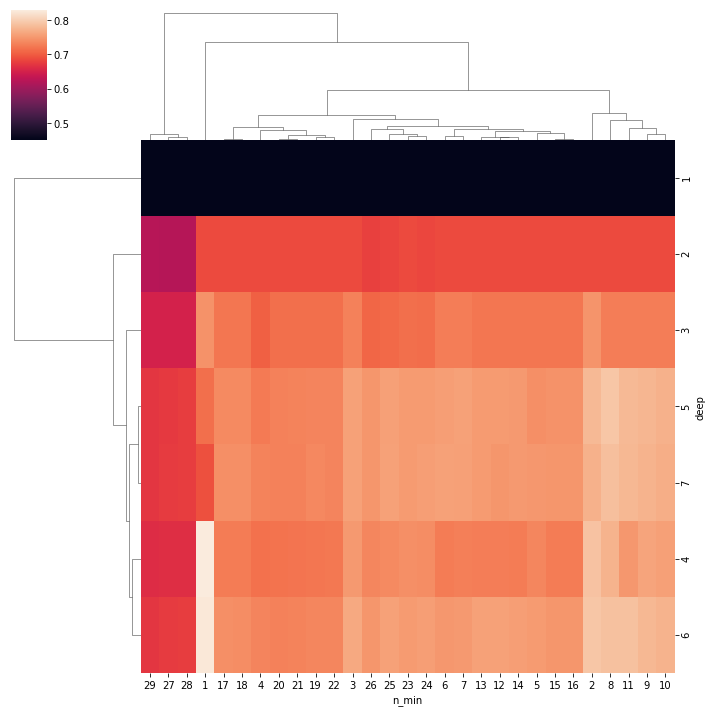

In [113]:
mses = []
ind_i = []
ind_j = []

for i in range (1,8):
    for j in range (1,30):
        regr = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr.fit(X_train, y_train)
        mse = regr.score(X_test, y_test)
        mses.append(mse)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'deep':ind_i, 'n_min':ind_j})
sns.clustermap(df_mse.pivot(index='deep',
              columns='n_min',
              values='mses'))
df_mse.pivot(index='deep',
             columns='n_min',
             values='mses')


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [114]:
path = regr.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.93683877e-02, 1.02123555e-01, 3.25094943e-01,
        5.28309112e-01, 8.39062463e-01, 2.27880399e+00, 3.17682550e+00,
        3.31350908e+00, 1.50037757e+01, 3.67928068e+01]),
 'impurities': array([18.92742731, 18.9467957 , 19.04891925, 19.37401419, 19.90232331,
        20.74138577, 23.02018976, 26.19701526, 29.51052434, 44.51430005,
        81.30710684])}

Text(0.5, 1.0, 'Relationship between Effective Alpha and Total Leaf Impurity')

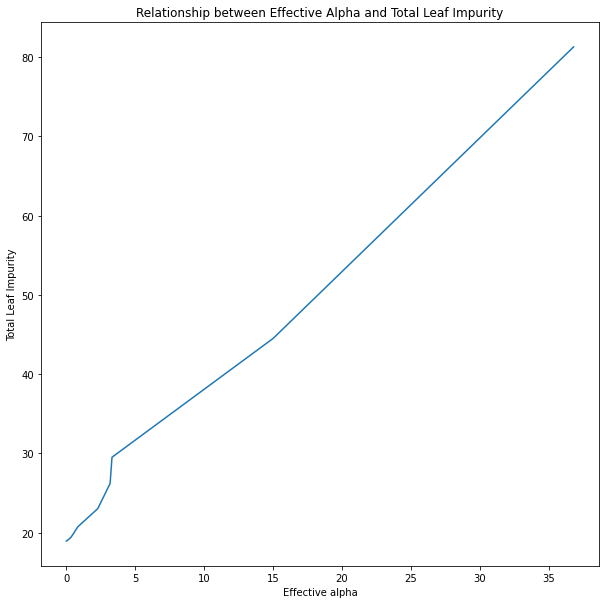

In [115]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10,10))
plt.plot(ccp_alphas,impurities)
plt.xlabel("Effective alpha")
plt.ylabel("Total Leaf Impurity")
plt.title("Relationship between Effective Alpha and Total Leaf Impurity")


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [116]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'tree depth')

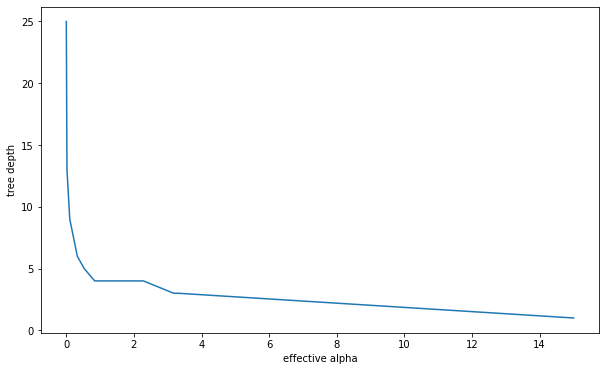

In [117]:
tree_depths = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1],tree_depths[:-1])
plt.xlabel('effective alpha')
plt.ylabel('tree depth')

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [118]:
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

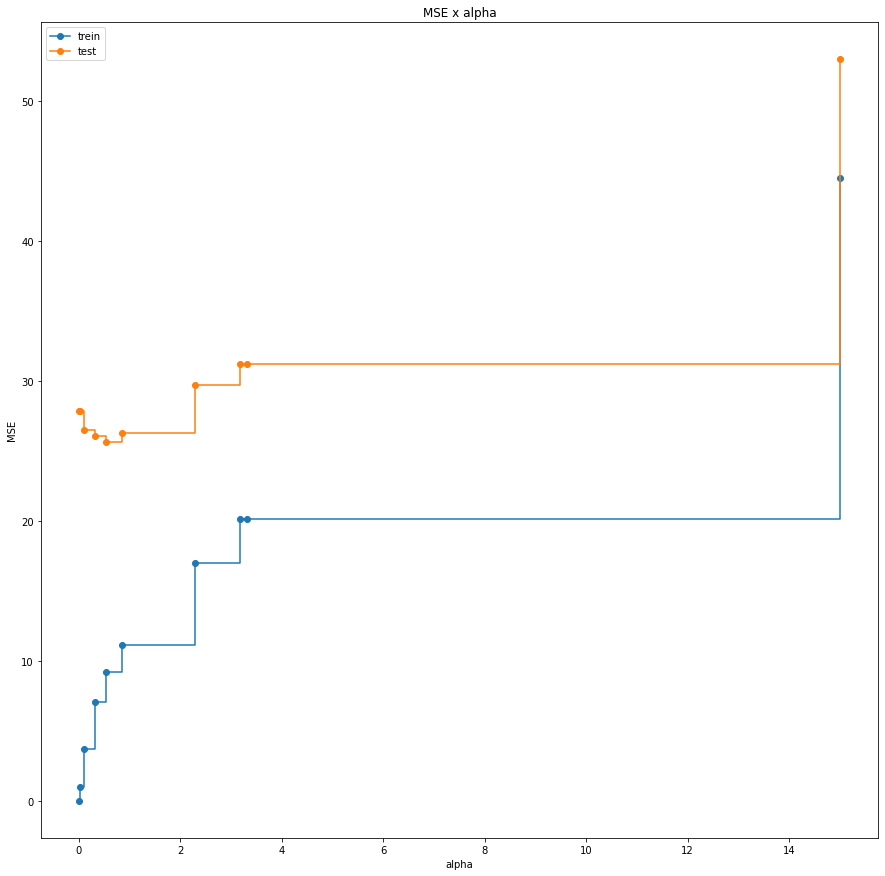

In [119]:
fig, ax = plt.subplots(figsize=(15,15))

ax.set_xlabel('alpha')
ax.set_ylabel('MSE')

ax.set_title('MSE x alpha')

ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label='trein', drawstyle='steps-post')
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label='test', drawstyle='steps-post')

ax.legend()
plt.show()

alpha value near to MSE min score is 2

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [120]:
final_tree = DecisionTreeRegressor(random_state=100, ccp_alpha=2)
final_tree.fit(X_train, y_train)

print(f'Deep:{final_tree.tree_.max_depth}')
print(f'R-squared test:{final_tree.score(X_test, y_test):.2f}')
print(f'MSE test:{mean_squared_error(y_test, final_tree.predict(X_test)):.2f}')

Deep:4
R-squared test:0.71
MSE test:27.85


### 7. Visualize esta árvore.

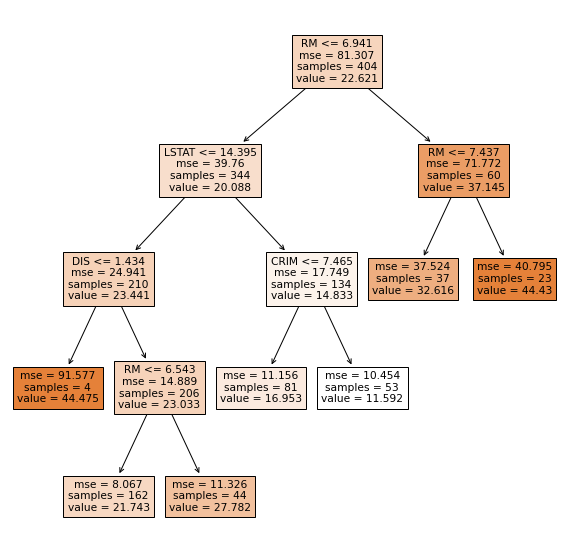

In [121]:
plt.rc('figure', figsize=(10,10))
tp = tree.plot_tree(
    final_tree,
    feature_names=X.columns,
    filled=True
)